In [24]:
import pandas as pd
import pickle as pk

In [2]:
advertising = pd.read_csv("tvmarketing.csv")

In [4]:
# Checkong the Null Values
advertising.isnull().sum()

TV       0
Sales    0
dtype: int64

In [5]:
# Visualization of the Data
import seaborn as sns 
import matplotlib.pyplot as plt
sns.set()

C:\Users\vishal\Anaconda4\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


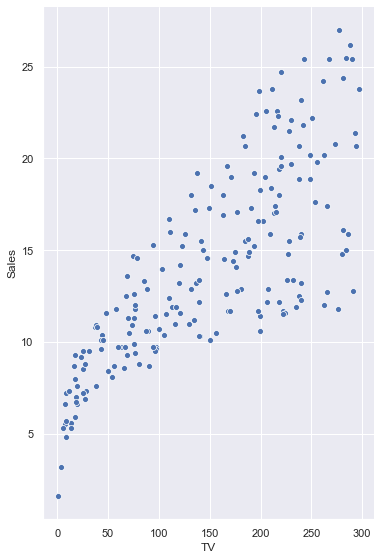

In [7]:
# Visualise the relationship between the features and the response using scatterplots
sns.pairplot(advertising,
    hue=None,
    hue_order=None,
    palette=None,
    vars=None,
    x_vars=['TV'],
    y_vars=['Sales'],
    kind='scatter',
    diag_kind='auto',
    markers=None,
    height=2.5,
    aspect=.7,
    dropna=True,
    plot_kws=None,
    diag_kws=None,
    grid_kws=None,
    size=8)

In [8]:
# Prepare the Data
X=advertising['TV']
y=advertising['Sales']

In [10]:
# Distribute the Data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=0)

In [13]:
import numpy as np

In [14]:
X_train = X_train[:, np.newaxis]
X_test = X_test[:, np.newaxis]

# Performing Linear Regression

In [17]:
# Import the Library
from sklearn.linear_model import LinearRegression
# Create a Object
lr=LinearRegression()
# Fit the model
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Coefficients Calculation

In [18]:
# Print the intercept and cofficient
print(lr.intercept_)
print(lr.coef_)

7.31081016541168
[0.04581434]


#### 𝑦=6.989+0.0464×𝑇𝑉 
#### Now, let's use this equation to predict our sales.

# Prediction

In [19]:
# Making predictions on the testing set
y_pred = lr.predict(X_test)

In [20]:
type(y_pred)

numpy.ndarray

In [21]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)

In [22]:
r_squared = r2_score(y_test, y_pred)

In [23]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 7.497479593464674
r_square_value : 0.725606346597073


In [25]:
# Save the Model
pickle.dump(lr , open('model.pkl','wb'))

In [26]:
# Load the Pickle file and predict the Model
model = pickle.load(open("model.pkl",'rb'))

In [30]:
print(model.predict([[161.8]]))

[14.72357073]


In [31]:
print(model.predict([[230.1]]))

[17.8526903]
